# Data Science and Business Analytics Internship | GRIP August 2021

## The Sparks Foundation

### `Task - 1 : Analysing and Predicting Scores of Student Based on Hours of Study`

## Project Submitted By : Bipul Harsh

In [4]:
# Importing required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1 Loading and Anlysing Student Dataset

In [5]:
df = pd.read_csv("student_scores_and_total_study_hrs.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 1.1 Checking for Features Property and Their Values Data Type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


The two features **Hours** and **Scores** contains 25 observations without any empty and dummy values. Values in Hours are of `Floating` type while the value of Scores are `Integer`.

## 1.2 Checking the Variation in Values of Each Features

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Observation from the above table tells that the `mean hour of study is approx 5 hours` and it ranges from minimum of 1 hr of study to maximum of 9.2 hrs of study.

While regarding **Scores** which has mean of 51 and ranges from minimum of 17 scores to maximum of 95 scores out of 100.

Increase in Hours of study and scores on going high also gives a hint of having a `positive correlation between the hours of study with scores`.

## 1.3 Visualising the relationship between the Hours (Feature) and Scores(Result)

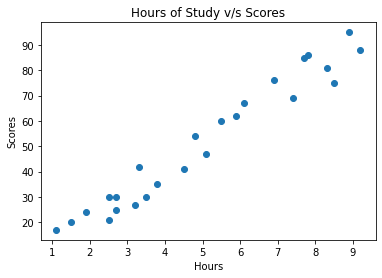

In [8]:
plt.figure()
plt.scatter(df.Hours, df.Scores)
plt.title("Hours of Study v/s Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")

plt.show()

Above diagram clearly support our assumption of having a positive correlation between `hours of study` and `scores`. It also convey a linear relationship between the feature and target. As Hours feature ranges from 1 to 9 so it helps in avoiding the normalisation step to perform as its range is already very small and result can be seen spread almost evenly.

# 2 Fitting and Testing the Linear Regression Model with Student Data

In [9]:
X, y = df.Hours, df.Scores
print(X.shape, y.shape)
# Reshaping the feature colum
X = X.values.reshape(-1, 1)
print(X.shape, y.shape)

(25,) (25,)
(25, 1) (25,)


## 2.1 Splitting the Dataset into Training and Testing Set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18, 1) (7, 1) (18,) (7,)


As dataset has only 25 values, so we need to split it by not allocating too much data for testing set which could starve our model and made it underfit.

## 2.2 Fitting and Analysing the Linear Regression Model

In [11]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [12]:
linear.score(X_train, y_train)

0.9514783240656934

Out Model is about 95% accurate on training model set

In [13]:
linear.score(X_test, y_test)

0.9553509219739938

Our model is 95% accurate on test set also

## 2.2.2 Anaysing Mean Square Error

In [14]:
y_pred_train = linear.predict(X_train)
y_pred_test = linear.predict(X_test)

print("Root Mean sq. Error for Test Set: {}".format(mean_squared_error(y_train, y_pred_train)**0.5 ))
print("Root Mean sq. Error for Train Set: {} ".format(mean_squared_error(y_test, y_pred_test)**0.5 ))

Root Mean sq. Error for Test Set: 5.580119821565466
Root Mean sq. Error for Train Set: 4.849370684387328 


Above result shows that model is very less deviated from the actual result and place itself successfully over the given result.

## 2.2.3 Visualising the Model Fit

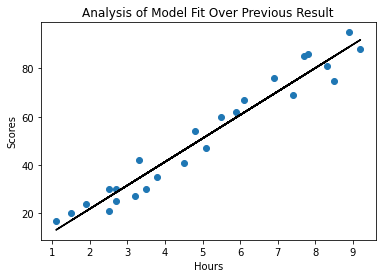

In [15]:
plt.figure()
plt.plot(X, linear.predict(X), "black", label="") #Represeting model path
plt.scatter(X, y)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Analysis of Model Fit Over Previous Result")
plt.show()

# 3 Avoiding Overshooting of Predicted Result
As we have train our model on dataset according to which with study hours around 9 gives result in 90-100 range. But the hours could go more than 9 hours, in that case our model might overshoot the max range of score causing it to predict scores more than 100. Now, the study hour cannot be more than 24 hrs a day we can also avoid processing wrong input.

In [27]:
def predict_student_score(study_hours):
    """
    Returns the possible score that student will score based on the number of hours he/she spent on study every day

    Arguments:
        study_hours (int) : The number of hours student spent studying every day.
    
    Returns
        score if 0 <= study_hours <= 24
        else -1 for wrong input
    """
    if study_hours < 0 or study_hours > 24:
        return -1
    else:
        return min( round(linear.predict(np.array([[study_hours]]))[0]), 100 )

In [29]:
dummy_testset = np.random.randint(-10, 30, 5)
print(dummy_testset)

[ 28  12  -8 -10   1]


In [30]:
print("Hours of study : Predicted Output")
for study_hours in dummy_testset:
    print(study_hours,':', predict_student_score(study_hours))

Hours of study : Predicted Output
28 : -1
12 : 100
-8 : -1
-10 : -1
1 : 12


# 4 Checking Prediction for Study of 9.25 hours/day

In [32]:
print("Predicton : {}".format(predict_student_score(9.25)))

Predicton : 92
